In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Tentukan path ke folder tempat dataset berada
folder_path = '../dataset'
file_name = 'tourism_rating.csv'

# Gabungkan folder_path dan file_name
file_path = os.path.join(folder_path, file_name)
data = pd.read_csv(file_path)

# Menampilkan data untuk memastikan dataset terload dengan benar
data.head()

,id,place_name,rating,reviewsCount,location/lat,location/lng
0,0,Taman Mini Indonesia Indah,4.6,164271,-6.302039,106.889892
1,1,Taman Nasional Kepulauan Seribu,4.6,555,-5.745366,106.615182
2,2,Pantai Pasir Perawan,4.8,717,-5.854806,106.622534
3,3,Wisata pulau,4.6,441,-5.934315,106.587570
4,4,Wisata pantai. Pulau pari,4.6,862,-5.862751,106.612058


Pilih Fitur yang Akan Digunakan

In [ ]:
# Pilih fitur numerik untuk klasterisasi
features = ['rating', 'reviewsCount', 'location/lat', 'location/lng']
X = data[features]

# Standarisasi data agar memiliki skala yang sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cek hasil setelah standarisasi
print(pd.DataFrame(X_scaled, columns=features).head())


     rating  reviewsCount  location/lat  location/lng
0  0.417743     13.106589      0.005634     -0.815792
1  0.417743     -0.292926      0.150458     -0.865344
2  1.091801     -0.279666      0.121986     -0.864018
3  0.417743     -0.302256      0.101301     -0.870324
4  0.417743     -0.267799      0.119919     -0.865907


Menentukan Jumlah Klaster dengan Metode Elbow

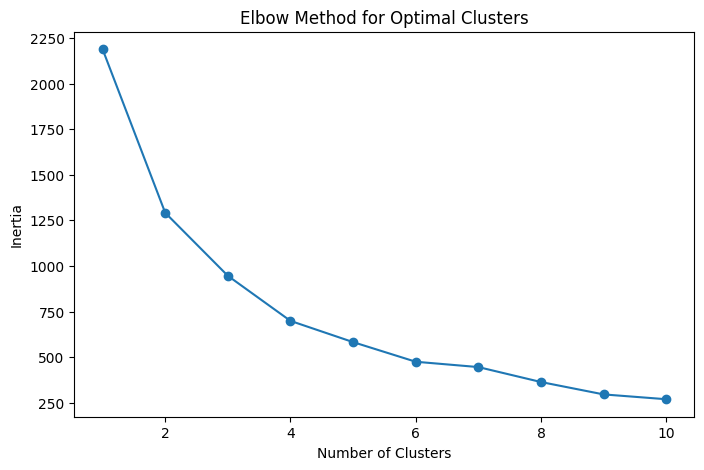

In [ ]:
# Hitung inertia untuk berbagai jumlah klaster
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot metode elbow
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Klasterisasi dengan K-Means

In [ ]:
# Inisialisasi K-Means dengan jumlah klaster optimal
optimal_k = 10  # Ganti sesuai hasil dari metode elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Tambahkan hasil klaster ke dataset asli
data['Cluster'] = clusters

# Tampilkan data dengan label klaster
print(data[['place_name', 'Cluster']].head())

                        place_name  Cluster
0       Taman Mini Indonesia Indah        2
1  Taman Nasional Kepulauan Seribu        3
2             Pantai Pasir Perawan        3
3                     Wisata pulau        3
4        Wisata pantai. Pulau pari        3


## Visualisasi Klaster

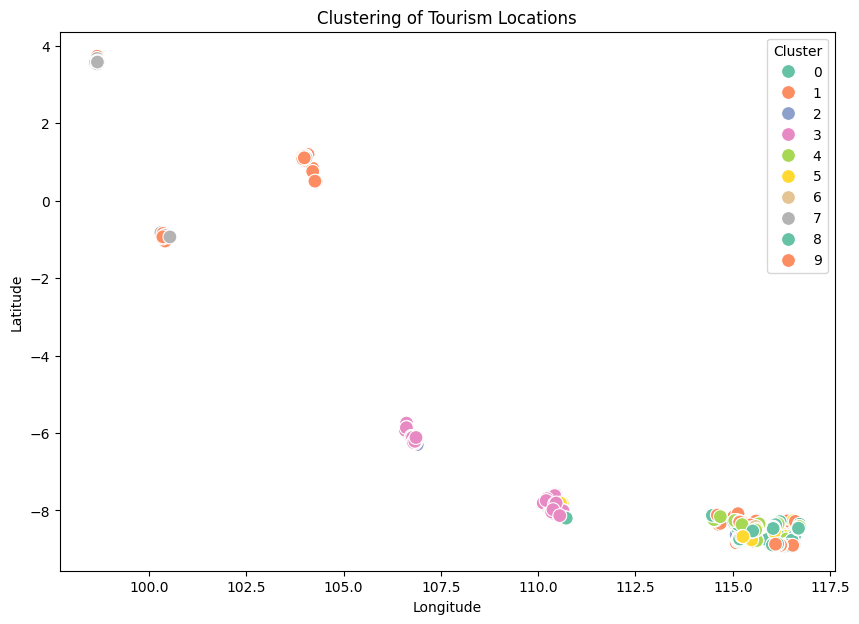

In [ ]:
# Visualisasi klaster berdasarkan koordinat geografis
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data['location/lng'],
    y=data['location/lat'],
    hue=data['Cluster'],
    palette='Set2',
    s=100
)
plt.title('Clustering of Tourism Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

Analisis Setiap Klaster

In [ ]:
# Statistik deskriptif untuk setiap klaster
for cluster in range(optimal_k):
    print(f"Cluster {cluster}")
    print(data[data['Cluster'] == cluster][features].describe())
    print("\n")

Cluster 0
           rating  reviewsCount  location/lat  location/lng
count  102.000000    102.000000    102.000000    102.000000
mean     4.319608   1287.117647     -8.549178    115.512946
std      0.077126   2445.819935      0.244967      1.284268
min      4.200000      6.000000     -8.923712    110.255069
25%      4.300000     69.000000     -8.737460    115.180070
50%      4.300000    255.000000     -8.531476    115.554954
75%      4.400000   1270.750000     -8.416140    116.246874
max      4.400000  13780.000000     -7.820273    116.716590


Cluster 1
          rating  reviewsCount  location/lat  location/lng
count  65.000000     65.000000     65.000000     65.000000
mean    4.330769   1784.184615      0.873538    102.891327
std     0.161944   3000.196899      1.145942      1.906091
min     3.900000      9.000000     -1.045025     98.619794
25%     4.200000    191.000000      0.831753    100.499146
50%     4.300000    766.000000      1.123827    104.007129
75%     4.500000   2312.0

Simpan Hasil Klasterisasi

In [ ]:
# Simpan dataset dengan label klaster
output_path = '../dataset/clustered_tourism.csv'
data.to_csv(output_path, index=False)
print(f"Dataset dengan klasterisasi telah disimpan di {output_path}")

Dataset dengan klasterisasi telah disimpan di ../dataset/clustered_tourism.csv
